In [1]:
import numpy as np
import pandas as pd
import math  
from sklearn.metrics import r2_score,mean_squared_error
from scipy import stats
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
df = pd.read_csv('drug2.csv')
df1 = df.copy(deep=True).drop('sex',axis=1)
df2 = df.copy(deep=True)
df_train,df_test = train_test_split(df1, test_size=0.2)
df2_train,df2_test = train_test_split(df2, test_size=0.2)

In [3]:
dose_train = df_train['dose']
resp_train = df_train['response']
dose_test = df_test['dose']
resp_test = df_test['response']

dose_train = np.array(dose_train)
resp_train = np.array(resp_train)
dose_test = np.array(dose_test)
resp_test = np.array(resp_test)

dose_train = dose_train.reshape(-1,1)
dose_test = dose_test.reshape(-1,1)

In [4]:
clf = LinearRegression(normalize=True)
clf.fit(dose_train,resp_train)
y_pred = clf.score(dose_test.reshape(-1,1),resp_test.reshape(-1,1)) #To calculate R Square value.

y_pred1 = clf.predict(dose_test)
r2_value = r2_score(resp_test,y_pred1)
print ('R^2 Value is :',r2_value) # Another approach to calculate R square value.

#print(y_pred1)
print(y_pred)
print(clf.intercept_) #Calculating Intercept
print(clf.coef_) #Calculating Coefficient


('R^2 Value is :', 0.27100997031152474)
0.27100997031152474
7.294058400127739
[14.97484109]


In [5]:
result=smf.ols(formula="response ~ dose", data=df1).fit()
print (result.params)
print (result.summary())

Intercept     7.253387
dose         15.002035
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.264
Method:                 Least Squares   F-statistic:                     1146.
Date:                Wed, 13 Feb 2019   Prob (F-statistic):          5.73e-215
Time:                        19:38:39   Log-Likelihood:                -18241.
No. Observations:                3200   AIC:                         3.649e+04
Df Residuals:                    3198   BIC:                         3.650e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [6]:
#Dealing with errors
rmse = mean_squared_error(resp_test, y_pred1)
print (rmse)

5003.810392994176


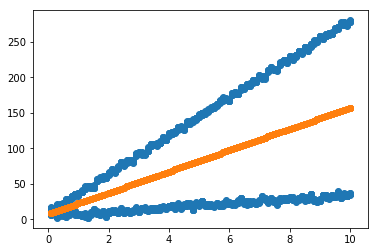

In [49]:
#sns.pairplot(df1, x_vars=['dose'], y_vars='response', size=7, aspect=0.7)
plt.scatter(dose_train,resp_train)
plt.scatter(dose_test,y_pred1)

In [23]:
sub = np.subtract(resp_test,y_pred1)


In [123]:
data = np.array([resp_test,y_pred1,np.subtract(resp_test,y_pred1)])
print(data)

[[   7.96        239.18        234.22       ...   10.63
    19.71          5.44      ]
 [ 118.79642634   97.95000355   75.61455056 ...  145.59896993
   215.58338931  160.48927193]
 [-110.83642634  141.22999645  158.60544944 ... -134.96896993
  -195.87338931 -155.04927193]]


In [86]:
dataset = pd.DataFrame({'resp_test':data[0,:],'y_pred1':data[1,:],'Error':data[2,:]})
#print(dataset['Error'])
dataset['stan_error']=dataset['Error']
dataset['stan_error']=((dataset['stan_error']-dataset['stan_error'].mean())/dataset['stan_error'].std())

/home/abhishek/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in sqrt
  This is separate from the ipykernel package so we can avoid doing imports until


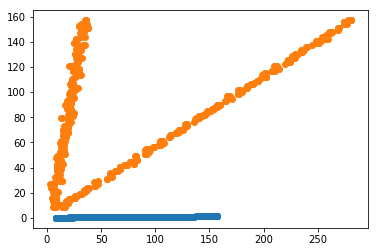

In [85]:
#sns.pairplot(dataset, x_vars=['y_pred1'], y_vars='Error', size=7, aspect=0.7)
#plt.scatter(dataset['y_pred1'],dataset['Error'])
plt.scatter(dataset['y_pred1'],np.sqrt(dataset['stan_error'])) #Plotting square root of standardized error vs y_pred1.
plt.scatter(resp_test,y_pred1)

/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


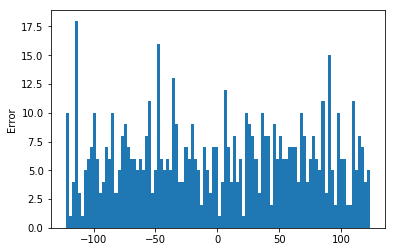

In [63]:
plt.hist(dataset['Error'], normed=False, bins=100)
plt.ylabel('Error');

In [62]:
#recounted = Counter(dataset['Error'])
#print (recounted)

/home/abhishek/.local/lib/python2.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


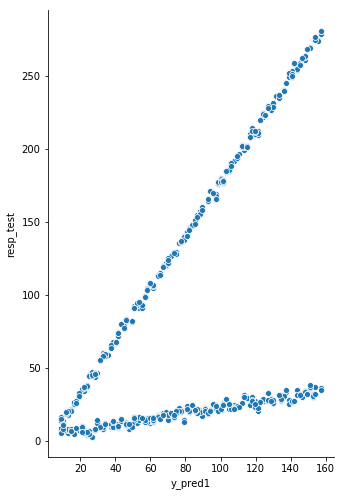

In [64]:
sns.pairplot(dataset, x_vars=['y_pred1'], y_vars='resp_test', size=7, aspect=0.7) #Plot for Predicted vs Real values.

In [3]:
dose_train = df_train['dose']
sex_train = df2_train['sex']
resp_train = df_train['response']
dose_test = df_test['dose']
sex_test = df2_test['sex']
resp_test = df_test['response']

dose_train = np.array(dose_train)
sex_train = np.array(sex_train)
resp_train = np.array(resp_train)
dose_test = np.array(dose_test)
sex_test = np.array(sex_test)
resp_test = np.array(resp_test)

dose_train = dose_train.reshape(-1,1)
dose_test = dose_test.reshape(-1,1)
sex_train = sex_train.reshape(-1,1)
sex_test = sex_test.reshape(-1,1)

In [3]:
clf2 = LinearRegression(normalize=True)
X = df2_train[['dose','sex']]
y = df2_train['response']
clf2.fit(X,y)
y_pred = clf2.score(X,y) #To calculate R Square value.

y_pred2 = clf2.predict(df2_test[['dose','sex']])
r2_value = r2_score(df2_test['response'],y_pred2)
print ('R^2 Value is :',r2_value) # Another approach to calculate R square value.

#print(y_pred1)
print(y_pred)
print(clf2.intercept_) #Calculating Intercept
print(clf2.coef_) #Calculating Coefficient


('R^2 Value is :', 0.8307853600584987)
0.8281840017393426
-55.36981780009188
[ 15.01110036 125.78834016]


In [4]:
result2=smf.ols(formula="response ~ dose+sex", data=df2).fit()
print (result2.params)
print (result2.summary())

Intercept    -56.118885
dose          15.002035
sex          126.744544
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     7736.
Date:                Fri, 15 Feb 2019   Prob (F-statistic):               0.00
Time:                        12:12:58   Log-Likelihood:                -15908.
No. Observations:                3200   AIC:                         3.182e+04
Df Residuals:                    3197   BIC:                         3.184e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------

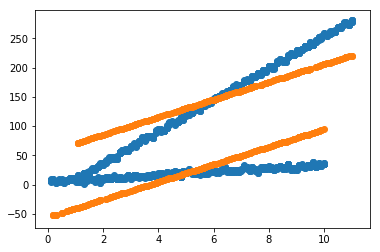

In [5]:
plt.scatter(df2_train['sex']+df2_train['dose'],df2_train['response'])
plt.scatter(df2_test['sex']+df2_test['dose'], y_pred2) #Drawing Hyperplane for our new predictor model.
#plt.scatter(df2_test['dose'], y_pred2)
plt.show()

In [6]:
data2 = np.array([df2_test['response'],y_pred2,np.subtract(df2_test['response'],y_pred2)])

In [15]:
dataset2 = pd.DataFrame({'resp_test':data2[0,:],'y_pred2':data2[1,:],'Error2':data2[2,:]})
print (dataset2['Error2'])

0    26.523775
dtype: float64


/home/abhishek/anaconda2/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Range of error')

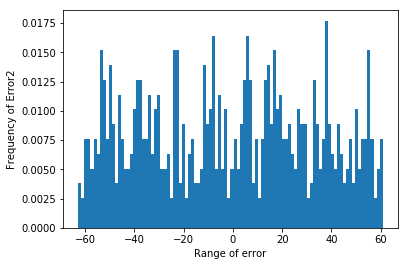

In [19]:
#plt.hist(dataset2['Error2'], normed=True, bins=50)
plt.hist(np.asarray(dataset2['Error2'], dtype='float'), bins=100, normed=True) #plot of frequency of errors vs range of errors.
plt.ylabel('Frequency of Error2');
plt.xlabel('Range of error') #THese are the errors divided into bins of approx. equal sizes.